Imports & Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up display options for clarity
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

Data Loading

In [2]:
# Attempt to load the dataset; handle missing file gracefully
try:
    df = pd.read_csv('liver_cirrhosis.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'liver_cirrhosis.csv' not found. Please check the file location.")
    df = pd.DataFrame()  # Prevent downstream errors

Dataset loaded successfully.


Initial Data Inspection

In [8]:
if not df.empty:
    print("Data Overview")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("="*50)
    print("Column Info & Data Types:")
    df.info()
    print("="*50)
    print("Sample Data:")
    display(df.head())

Data Overview
Rows: 25000, Columns: 19
Column Info & Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.50,149.00,4.04,227.00,598.00,52.70,57.00,256.00,9.90,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.50,219.00,3.93,22.00,663.00,45.00,75.00,220.00,10.80,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.50,320.00,3.54,51.00,"1,243.00",122.45,80.00,225.00,10.00,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.70,255.00,3.74,23.00,"1,024.00",77.50,58.00,151.00,10.20,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.90,486.00,3.54,74.00,"1,052.00",108.50,109.00,151.00,11.50,1


Descriptive Statistics

In [9]:
if not df.empty:
    print("Descriptive Statistics (Numerical Features):")
    display(df.describe())

Descriptive Statistics (Numerical Features):


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,"25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00"
mean,"1,887.12","18,495.88",3.40,372.33,3.49,100.18,"1,995.68",123.17,123.82,256.01,10.73,2.00
std,"1,091.69","3,737.60",4.71,193.67,0.38,73.18,"1,798.89",47.75,52.79,98.68,0.90,0.81
min,41.00,"9,598.00",0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,"1,080.00","15,694.00",0.80,275.00,3.29,52.00,"1,032.00",92.00,92.00,189.00,10.00,1.00
50%,"1,680.00","18,499.00",1.30,369.51,3.51,97.65,"1,828.00",122.56,124.70,251.00,10.60,2.00
75%,"2,576.00","20,955.00",3.40,369.51,3.75,107.00,"1,982.66",134.85,127.00,311.00,11.10,3.00
max,"4,795.00","28,650.00",28.00,"1,775.00",4.64,588.00,"13,862.40",457.25,598.00,721.00,18.00,3.00


Target Variable Distribution (Stage)

Stage Distribution (% of patients):
Stage
1   33.06
2   33.76
3   33.18
Name: proportion, dtype: float64


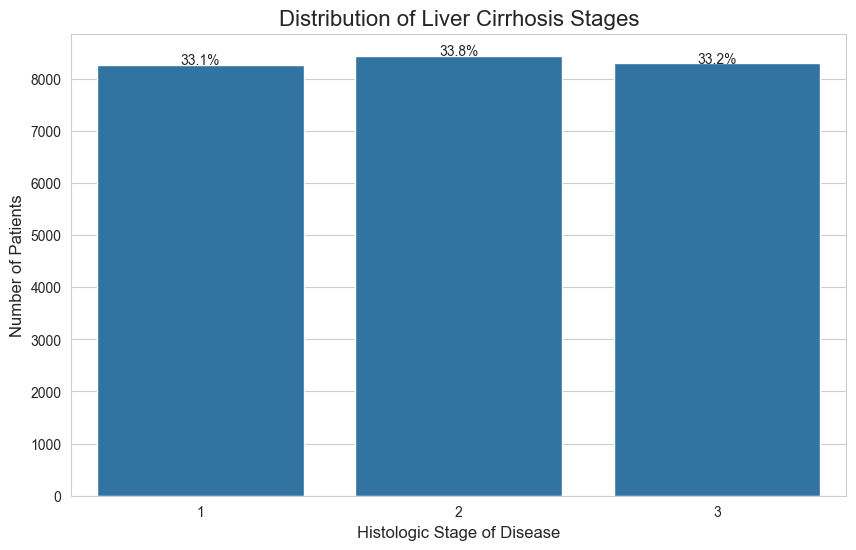

In [10]:
if 'Stage' in df.columns:
    # Calculate and display the distribution of disease stages
    stage_distribution = df['Stage'].value_counts(normalize=True).sort_index() * 100
    print("Stage Distribution (% of patients):")
    print(stage_distribution)
    
    # Visualize the distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Stage', data=df, order=sorted(df['Stage'].unique()))
    plt.title('Distribution of Liver Cirrhosis Stages', fontsize=16)
    plt.ylabel('Number of Patients', fontsize=12)
    plt.xlabel('Histologic Stage of Disease', fontsize=12)
    
    # Annotate bars with percentages
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 5, f'{height/len(df)*100:.1f}%', ha="center")
    plt.show()

Feature Engineering & Transformation

In [11]:
# Convert age from days to years for interpretability
if 'Age' in df.columns:
    df['Age_in_Years'] = df['Age'] / 365.25
    df.drop('Age', axis=1, inplace=True)
    print("Converted 'Age' from days to years:")
    display(df[['Age_in_Years']].head())

# Review categorical columns for encoding strategy
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"  {col}: {df[col].unique()}")

Converted 'Age' from days to years:


,Age_in_Years
0,50.65
1,54.00
2,32.41
3,45.08
4,59.41



Unique values in categorical columns:
  Status: ['C' 'D' 'CL']
  Drug: ['Placebo' 'D-penicillamine']
  Sex: ['F' 'M']
  Ascites: ['N' 'Y']
  Hepatomegaly: ['Y' 'N']
  Spiders: ['N' 'Y']
  Edema: ['N' 'Y' 'S']


Categorical Feature Encoding

In [12]:
# Copy DataFrame to preserve original
df_encoded = df.copy()

# Binary encoding for Y/N and M/F columns
binary_map = {'Y': 1, 'N': 0}
for col in ['Ascites', 'Hepatomegaly', 'Spiders']:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(binary_map)
if 'Sex' in df_encoded.columns:
    df_encoded['Sex'] = df_encoded['Sex'].map({'M': 1, 'F': 0})

# Ordinal encoding for 'Edema'
if 'Edema' in df_encoded.columns:
    edema_map = {'N': 0, 'S': 1, 'Y': 2}
    df_encoded['Edema'] = df_encoded['Edema'].map(edema_map)

# One-hot encoding for multi-category columns
for col in ['Status', 'Drug']:
    if col in df_encoded.columns:
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True, dtype=int)

print("Data after encoding categorical features:")
display(df_encoded.head())
print("\nEncoded DataFrame info:")
df_encoded.info()

Data after encoding categorical features:


,N_Days,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_Years,Status_CL,Status_D,Drug_Placebo
0,2221,0,0,1,0,0,0.50,149.00,4.04,227.00,598.00,52.70,57.00,256.00,9.90,1,50.65,0,0,1
1,1230,1,1,0,1,0,0.50,219.00,3.93,22.00,663.00,45.00,75.00,220.00,10.80,2,54.00,0,0,1
2,4184,0,0,0,0,0,0.50,320.00,3.54,51.00,"1,243.00",122.45,80.00,225.00,10.00,2,32.41,0,0,1
3,2090,0,0,0,0,0,0.70,255.00,3.74,23.00,"1,024.00",77.50,58.00,151.00,10.20,2,45.08,0,1,1
4,2105,0,0,1,0,0,1.90,486.00,3.54,74.00,"1,052.00",108.50,109.00,151.00,11.50,1,59.41,0,1,1



Encoded DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Sex            25000 non-null  int64  
 2   Ascites        25000 non-null  int64  
 3   Hepatomegaly   25000 non-null  int64  
 4   Spiders        25000 non-null  int64  
 5   Edema          25000 non-null  int64  
 6   Bilirubin      25000 non-null  float64
 7   Cholesterol    25000 non-null  float64
 8   Albumin        25000 non-null  float64
 9   Copper         25000 non-null  float64
 10  Alk_Phos       25000 non-null  float64
 11  SGOT           25000 non-null  float64
 12  Tryglicerides  25000 non-null  float64
 13  Platelets      25000 non-null  float64
 14  Prothrombin    25000 non-null  float64
 15  Stage          25000 non-null  int64  
 16  Age_in_Years   25000 non-null  float64
 17  Status_CL      25000 non-

Feature Scaling and Final Data Preparation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df_encoded.drop('Stage', axis=1)
y = df_encoded['Stage']

# List of numerical columns to scale
numerical_features = [
    'N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
    'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age_in_Years'
]

# Scale numerical features for better model performance
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("Scaled numerical features (first 5 rows):")
display(X.head())

# Split data into training and test sets, stratified by stage
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nData split complete.")
print(f"Training set: {X_train.shape}, Target: {y_train.shape}")
print(f"Test set:    {X_test.shape}, Target: {y_test.shape}")
print("Training set stage distribution:")
print(y_train.value_counts(normalize=True).sort_index())
print("Test set stage distribution:")
print(y_test.value_counts(normalize=True).sort_index())

Scaled numerical features (first 5 rows):


,N_Days,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Age_in_Years,Status_CL,Status_D,Drug_Placebo
0,0.31,0,0,1,0,0,-0.62,-1.15,1.45,1.73,-0.78,-1.48,-1.27,-0.00,-0.92,0.00,0,0,1
1,-0.60,1,1,0,1,0,-0.62,-0.79,1.17,-1.07,-0.74,-1.64,-0.92,-0.36,0.07,0.33,0,0,1
2,2.10,0,0,0,0,0,-0.62,-0.27,0.14,-0.67,-0.42,-0.02,-0.83,-0.31,-0.81,-1.78,0,0,1
3,0.19,0,0,0,0,0,-0.57,-0.61,0.67,-1.05,-0.54,-0.96,-1.25,-1.06,-0.59,-0.54,0,1,1
4,0.20,0,0,1,0,0,-0.32,0.59,0.14,-0.36,-0.52,-0.31,-0.28,-1.06,0.85,0.86,0,1,1



Data split complete.
Training set: (20000, 19), Target: (20000,)
Test set:    (5000, 19), Target: (5000,)
Training set stage distribution:
Stage
1   0.33
2   0.34
3   0.33
Name: proportion, dtype: float64
Test set stage distribution:
Stage
1   0.33
2   0.34
3   0.33
Name: proportion, dtype: float64


Model Training (Random Forest)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("Training Random Forest model...")

# Initialize and train the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

print("Model training complete.")

Training Random Forest model...
Model training complete.


Model Evaluation

In [15]:
print("Evaluating model on test data...")

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("="*50)

# Detailed classification report
print("Classification Report (Precision, Recall, F1-score by Stage):")
print(classification_report(y_test, y_pred))

Evaluating model on test data...
Overall Accuracy: 0.9536 (95.36%)
Classification Report (Precision, Recall, F1-score by Stage):
              precision    recall  f1-score   support

           1       0.96      0.94      0.95      1653
           2       0.94      0.95      0.94      1688
           3       0.97      0.97      0.97      1659

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000

